## BASELINE

---




Nessa etapa o objetivo foi criar referências sólidas antes de modelos complexos . Criamos um Dummy Classifier  que seá nosso baseline mínimo, ou seja, um valor de referÊncia , além da regressão Logística e Árvore de Decisão que confirmam a presença de sinal preditivo nos dados, depois foi feita avaliação com ROC-AUC e matriz de confusão.








In [1]:
import numpy as np
import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')

y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

print(X_train.shape, X_test.shape)

(108090, 30) (36030, 30)


### Definindo função auxiliar de avaliação

---



In [3]:
def avaliar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred, digits=4))
    print('ROC-AUC:', roc_auc_score(y_test, y_prob))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

### Primeiro modelo – Dummy Classifier


---


definimos uma referência mínima, ou sej, qualquer modelo real deve superar este resultado.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0     0.9981    1.0000    0.9991     35962
         1.0     0.0000    0.0000    0.0000        68

    accuracy                         0.9981     36030
   macro avg     0.4991    0.5000    0.4995     36030
weighted avg     0.9962    0.9981    0.9972     36030

ROC-AUC: 0.5


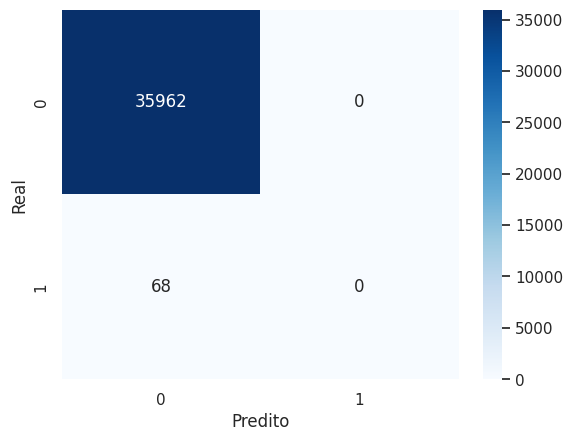

In [4]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

avaliar_modelo(dummy, X_test, y_test)

 ## Segundo modelo – Regressão Logística

---



Escolhido por ser um modelo linear interpretável e forte baseline para problemas binários

              precision    recall  f1-score   support

         0.0     0.9998    0.9766    0.9881     35962
         1.0     0.0685    0.9118    0.1274        68

    accuracy                         0.9764     36030
   macro avg     0.5342    0.9442    0.5577     36030
weighted avg     0.9981    0.9764    0.9864     36030

ROC-AUC: 0.9783218887911096


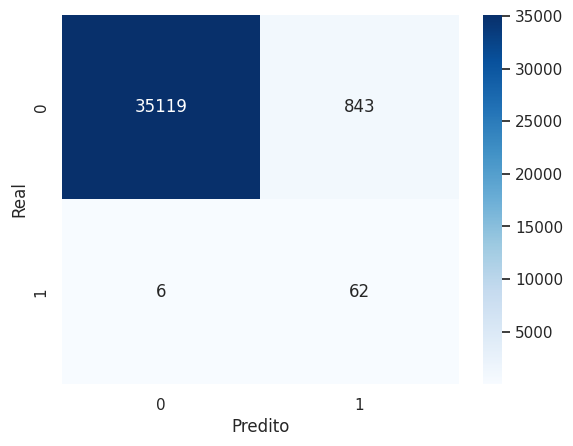

In [5]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train, y_train)

avaliar_modelo(log_reg, X_test, y_test)

*  Os resultados da regressão mostram a capacidade de identificação da classe positiva o modelo conseguiu identificar 62 casos positivos corretamente e apenas 6 casos positivos foram perdidos (FN). O recall da classe positiva =91% foi muito bom para um baseline.
*  Existe um  número significativo de falsos positivos, havendo  a necessidade de técnicas adicionais de modelagem, como ajuste de limiar e engenharia de atributos.


## Terceiro modelo – Árvore de Decisão Simples

---



Capta não linearidades e tem fácil interpretação inicial

              precision    recall  f1-score   support

         0.0     0.9998    0.9715    0.9854     35962
         1.0     0.0553    0.8824    0.1041        68

    accuracy                         0.9713     36030
   macro avg     0.5275    0.9269    0.5448     36030
weighted avg     0.9980    0.9713    0.9838     36030

ROC-AUC: 0.9249260657491405


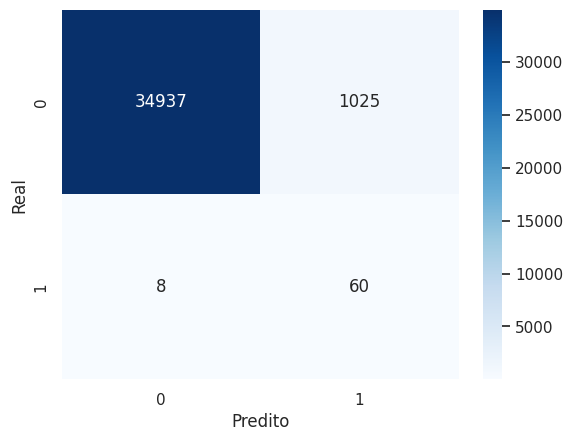

In [6]:
dt = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train, y_train)

avaliar_modelo(dt, X_test, y_test)

*  Nesse segundo modelo podemos identificar o recall da classe positiva = 88%, bom mas ainda inferior ao modelo linear. O modelo tem  maior complexidade e capacidade de capturar relações não lineares, porem se tratando de um abaseline nao apresentou ganhos significativo em relação ao modelo anterior.

*  Possivél sensibilidade ao desbalanceamento dos dados, ou seja , a  evolução do desempenho não depende apenas do aumento da complexidade do modelo, mas da qualidade das representações dos dados e do tratamento adequado das variáveis que faremos nas etapas seguinte.

### Curvas ROC para comparaçao de modelos

---



*  Criamos o  modelo Dummy  apenas como referência ,a regressão Logística geralmente apresenta melhor equilíbrio Precision/Recall , porém a árvore simples pode sofrer overfitting.

*  Os modelos baseline fornecem limites inferiores para o desempenho esperado. Essa etapa garante que a evolução do modelo seja guiada por evidência.

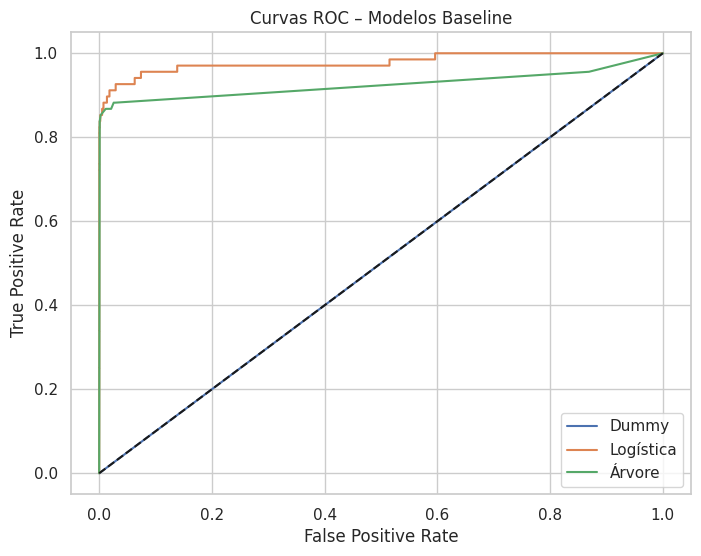

In [7]:
modelos = {
    'Dummy': dummy,
    'Logística': log_reg,
    'Árvore': dt
}

plt.figure(figsize=(8,6))

for nome, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=nome)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC – Modelos Baseline')
plt.legend()
plt.show()